어떤 종류의 사람들이 많이 살아남았는지에 대한 분석.

머신러닝을 이용해 어떤 승객이 생존했을지 예측해보자.

PassengerId : 각 승객의 고유 번호

Survived : 생존 여부(종속 변수)

0 = 사망
1 = 생존
Pclass : 객실 등급 - 승객의 사회적, 경제적 지위

1st = Upper
2nd = Middle
3rd = Lower
Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

Parch : 동반한 Parent(부모) Child(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항

C = Cherbourg
Q = Queenstown
S = Southampton

# Collecting the data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # 그래프로 시각화해서 보여주는 모듈
%matplotlib inline

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Exploratory data analysis

In [6]:
train.head()   # train DataFrame의 정보

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()   # test DataFrame의 정보

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.shape   # 891개의 승객 정보, 12개의 컬럼

(891, 12)

In [9]:
test.shape    # 418개의 승객 정보, Survived 컬럼을 제외한 11개의 컬럼

(418, 11)

In [10]:
train.info()   # 각 컬럼의 data type, NaN 값의 수를 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train.isnull().sum()   # 컬럼별 Null 값의 개수를 알 수 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [15]:
# 살았는지 죽었는지 두개의 bar_chart를 보여주는 함수
# parameter로 feature를 하나씩 보내준다.
# 성별을 보내면 성별에 따라 죽은 사람의 수와 살아남은 사람의 수를 보여준다.
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

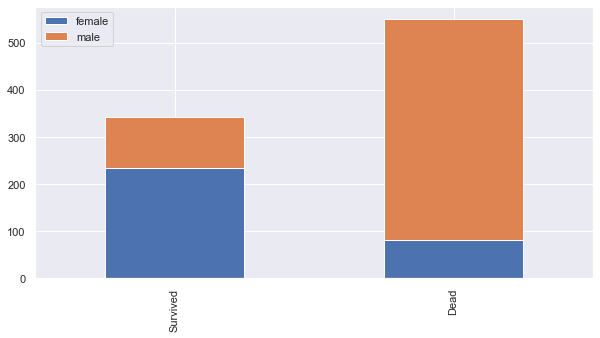

In [16]:
bar_chart('Sex')   # 성별에 따라서 생존 비율을 확인한다.
# 상대적으로 여성이 많이 살아남았다.

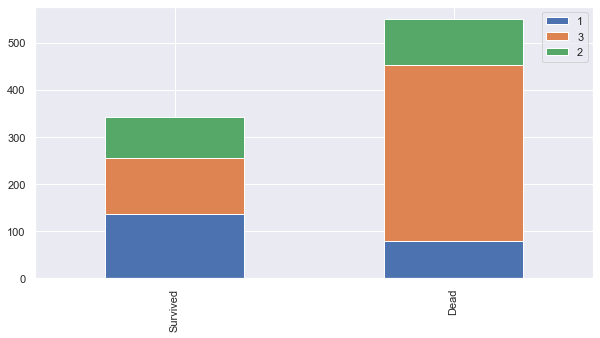

In [17]:
bar_chart('Pclass')   # 객실 등급에 따라서 생존 비율을 확인한다.
# 상대적으로 객실 등급이 높을수록 많이 살아남았다.

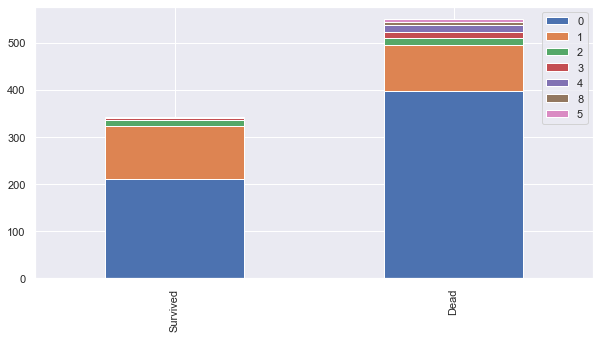

In [18]:
bar_chart('SibSp')   # 동반한 형제자매와 배우자의 수에 따른 생존비율
# 혼자 탔을 경우 많이 죽은 것으로 보인다.

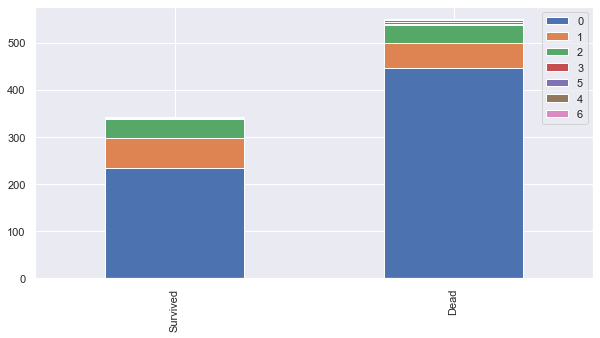

In [19]:
bar_chart('Parch')   # 동승한 부모나 자녀의 수에 따른 생존비율
# 혼자 탄 경우 많이 죽은 것으로 보인다.

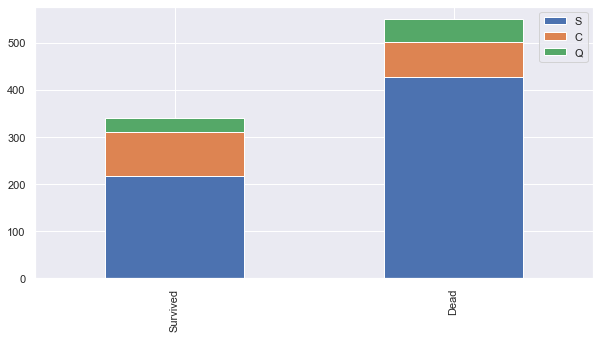

In [20]:
bar_chart('Embarked')   # 승선한 선착장에 따른 생존비율

# Feature engineering

Feature란, 컬럼들
즉, 측량이 된 값들

우리는 Feature들을 Feature vector들로 만들어줘야 한다.
 => 컴퓨터가 이해하기 쉽게 숫자로

비어있는 값(NaN)들도 알맞는 변수로 대체해서 넣어줘야 한다.

이름 항목에서 타이틀(Mr, Mrs)들을 빼내고 이름 항목을 삭제한다.
 => 타이틀은 남자, 결혼을 한 여자, 결혼을 하지 않은 여자의 정보를 가지고 있다.
 => 이름이 생존과는 연관이 없기 때문

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Name

#### 정규표현식
- \- 는 범위를 나타내며 'A-Za-z'는 알파벳 소문자와 대문자를 모두 포함하는 범위를 나타낸다.
- 위 범위를 문자클래스(character class)인 [] 로 묶어주면, '[] 사이의 문자들과 매치'라는 의미를 갖는다고 한다. 따라서, [A-Za-z]는 알파벳 소문자와 대문자중 하나라도 매치가 되는가를 나타낸다.
- 그 뒤에 + 는 * 와 비슷하게 사용되는데 유일한 차이점은 + 는 적어도 하나 이상을 나타내며, * 는 하나 이상이 매치가 되는가를 나타낸다. 즉, 위에서 [A-Za-z]+ 는 모든 알파벳으로 구성 가능한 어떤 영어 단어든 매치가 가능하다는 것을 의미한다.
- 위에 그룹을 () 로 지정한다고 하였는데, 그룹 밖에 존재하는 \\ 는 \. 을 문자열 그대로 사용하기 위해 붙였으며, 나타내는 것은 Mr\., Miss\., Mrs\. 와 같이 영어단어\. 로 구성된 형태를 추출하며, \.을 제외시킨다는 것이다.
- 이해가 되지 않는다면, \\\.([A-Za-z]+)와 같이 앞에 붙여주어 어떤 결과를 추출하는지 확인해보면 이해가 될 수 있다.

In [22]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
# 'Name' 컬럼에서 영어단어. 으로 구성된 단어들을 추출하여
# .을 제외시키고 'Title'의 컬럼에 저장한다.

In [23]:
train['Title'].value_counts()
# 'Title' 컬럼의 데이터별 개수를 알 수 있다.

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [24]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,
                 "Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3,
                 "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [25]:
train.head()   # title 컬럼에 숫자가 들어있는 것을 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
test.head()   # title 컬럼에 숫자가 들어있는 것을 확인

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


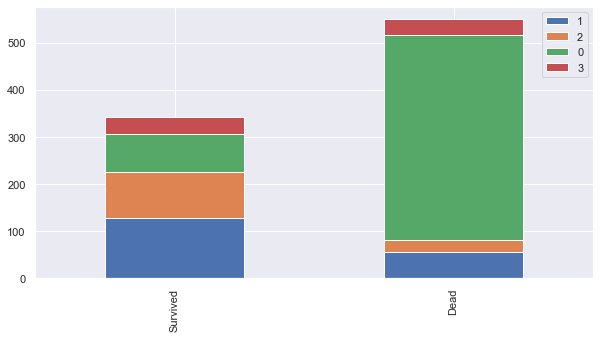

In [27]:
bar_chart('Title')
# 남자는 많이 죽었다
# 여자들은 상대적으로 많이 살았다

In [28]:
# Name 컬럼은 더이상 필요하지 않기 때문에 삭제한다.
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## Sex
male: 0 female: 1

In [31]:
# 남자는 0, 여자는 1로 매핑시켜준다.
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

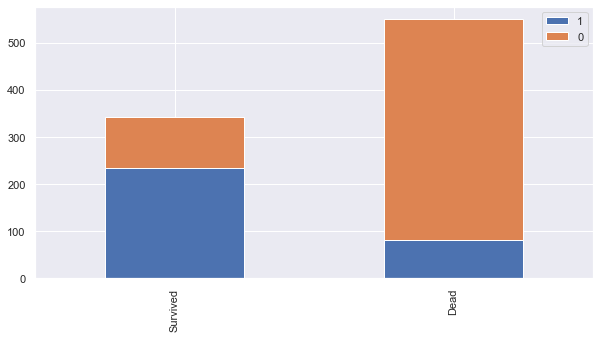

In [32]:
# 남자가 많이 죽고 여자가 많이 살아 남았다.
bar_chart('Sex')

## Age
Age 값이 비어있는 경우도 있다.

비어 있는 경우 전체 나이의 평균값을 넣어줘도 되지만

아까 구한 title을 가지고

Mr은 Mr 나이의 평균값으로,

Miss는 Miss 나이의 평균값으로,

Mrs는 Mrs 나이의 평균값으로,

나머지는 나머지 나이의 평균값으로 넣어주는 게 더 좋을 것 같다.

In [33]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


In [34]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

# Age 컬럼의 값이 Null인 경우, 각 Title 별로 Age 값의 평균 값으로 바꿔라
# 평균 값을 쓸 때 mean을 써도 되지만 여기서는 median을 썼다.

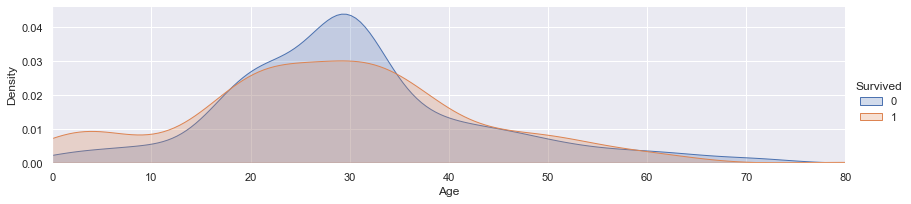

In [35]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()
# 전체 나이에 대한 생존, 사망 유무를 보여준다.

(0.0, 20.0)

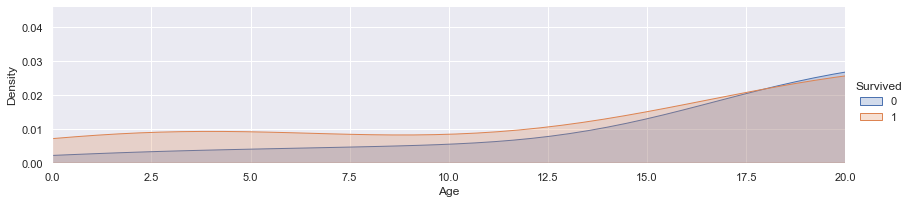

In [36]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)
# 0 ~ 20살까지 생존, 사망 유무

(20.0, 30.0)

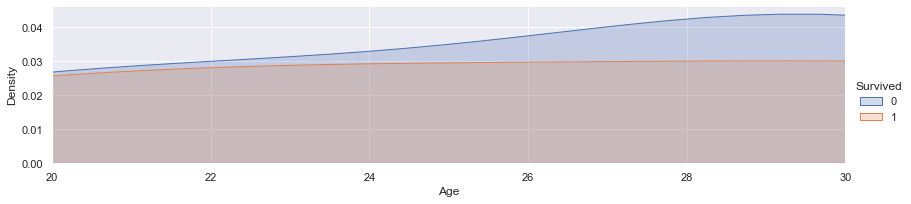

In [37]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)
# 20 ~ 30살까지 생존, 사망 유무

(30.0, 40.0)

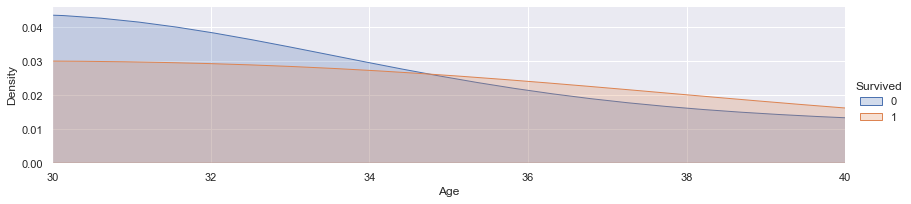

In [38]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)
# 30 ~ 40살까지 생존, 사망 유무

(40.0, 60.0)

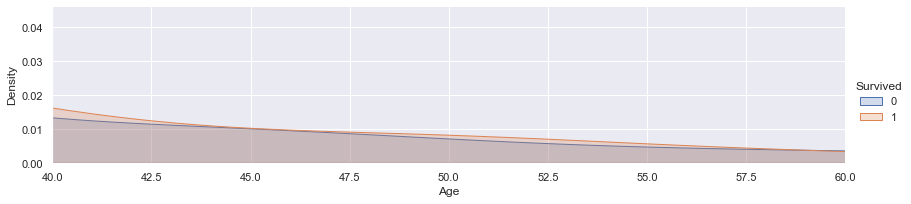

In [39]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)
# 40 ~ 60살까지 생존, 사망 유무

(60.0, 80.0)

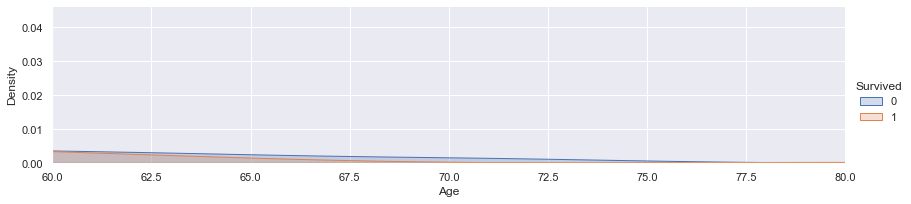

In [40]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)
# 60 ~ 살 생존, 사망 유무

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4  

In [43]:
# 나이대별로 범위를 지정해 값을 치환해준다.
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


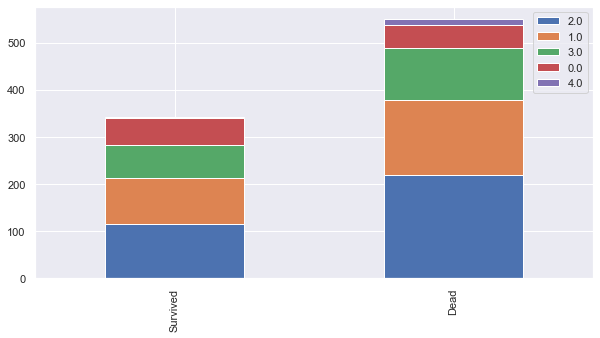

In [45]:
bar_chart('Age')

## Embarked
부자 동네에 사는 사람이 높은 등급에 탔을 확률이 높다.  
등급별 승선 항구를 조사한다.  

<AxesSubplot:>

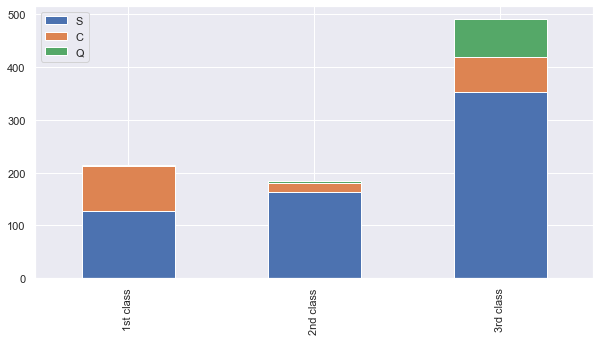

In [46]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

# Q 항구에서 타는 사람들중 1등급에 타는 사람은 안보인다.
# S 항구에서 타는 사람이 전체 비율의 50%를 훨씬 뛰어 넘는다.
# => 승선한 항구의 정보가 써있지 않은 경우 S 항구라고 봐도 무방하다.

In [47]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Embarked의 값이 Null이라면 S 를 채워 넣어라

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [49]:
train.info()
# Embarked 값이 초기에는 2개의 Null 값이 존재했는데 지금은 다 채워졌다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [50]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
# Embarked의 값을 치환해라
# S는 0으로, C는 1로, Q는 2로 치환

## Fare
티켓의 요금

In [51]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

# Fare 값이 Null인 경우 Pclass 별로 Fare의 평균값으로 채워라

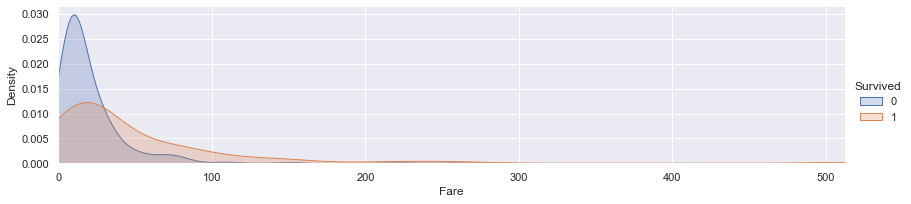

In [52]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()
# 싼 티켓을 구매한 사람들이 더 많이 죽고
# 비싼 티켓을 구매한 사람들이 더 많이 살았다.

(0.0, 20.0)

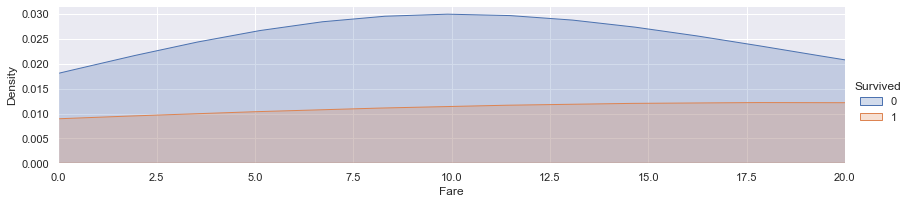

In [53]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)
# 요금 값이 0 ~ 20인 사람들의 생존, 사망 분포

(0.0, 30.0)

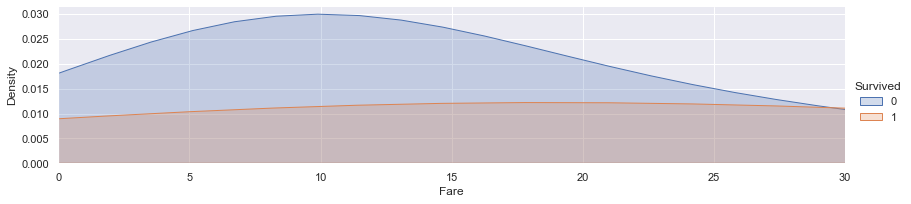

In [54]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)
# 요금 값이 0 ~ 30인 사람들의 생존, 사망 분포

(0.0, 512.3292)

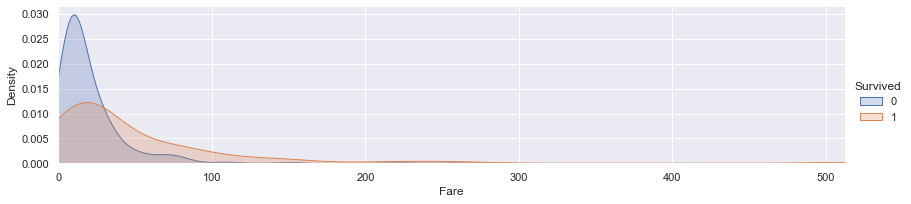

In [55]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)
# 요금 값이 0 ~ 인 사람들의 생존, 사망 분포

In [56]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
    
# 티켓 가격별로 범위를 나누어 값을 치환한다.

In [57]:
train.head()
# Fare 값이 치환된 것을 볼 수 있다.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


## Cabin
객실번호

In [58]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [59]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
# Cabin 값을 Cabin 값의 첫 알파벳으로 치환한다.

In [60]:
train.head()
# Cabin의 값이 알파벳으로 바뀐 것을 볼 수 있다.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


<AxesSubplot:>

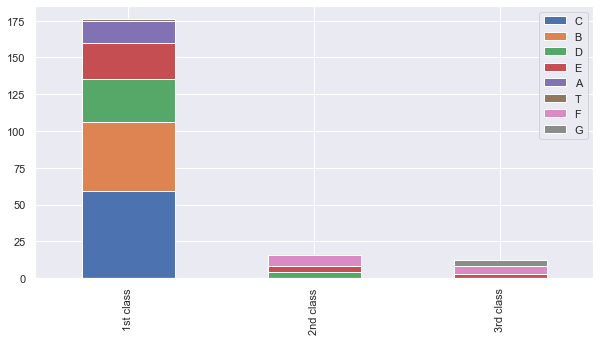

In [61]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
# Pclass 값에 따라 Cabin 값의 개수를 출력한다.
# A, B, C 값이 2등급과 3등급에는 없다.

In [62]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2,
                 "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
    
# Cabin 값들을 숫자로 매핑
# 숫자의 범위가 비슷하지 않으면 큰 거리에 있는 것을 더 중요하게 여길 수 있다.
# 남자와 여자 : 1, 0
# 10$ 와 20$ : 10, 20
# 머신러닝이 10$ 차이를 남자와 여자의 차이보다 더 중요하게 여길 수 있다.

In [63]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

# Cabin 컬럼 중 Null 값들은 Pclass별로 Cabin의 평균값으로 치환

## FamilySize

In [64]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
# FamilySize 컬럼을 만들고 SibSp(동승한 형제자매, 배우자)와
# Parch(동승한 부모, 자식)를 더한 값에 1(자기 자신)을 더한 값을 넣어준다.

(0.0, 11.0)

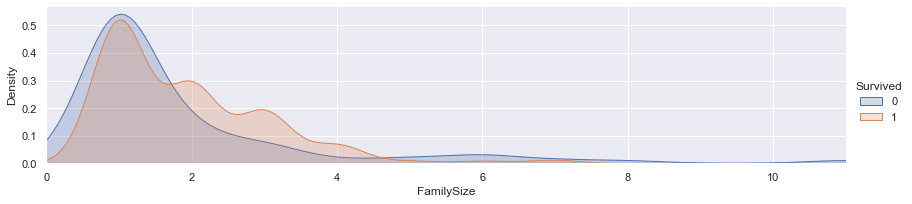

In [65]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)
# 혼자 승선한 경우보다 가족이 함께 있는 경우 생존할 확률이 조금 더 높다.

In [66]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8,
                  9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
    
# FamilySize의 값을 더 작은 값으로 치환

# 숫자의 범위가 비슷하지 않으면 큰 거리에 있는 것을 더 중요하게 여길 수 있다.
# 남자와 여자 : 1, 0
# 10$ 와 20$ : 10, 20
# 머신러닝이 10$ 차이를 남자와 여자의 차이보다 더 중요하게 여길 수 있다.

In [67]:
train.head()
# FamilySize 값이 작아진 것을 볼 수 있다.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [68]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

# train, test DataFrame에서 Ticket, SibSp, Parch 컬럼을 날린다.
# Ticket은 중요한 정보가 아니고, Sibsp와 Parch는 FamilySize로 통합해줬다.
# train DataFrame에서 PassengerId 컬럼을 지운다.

In [69]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

# 원본은 두고 우리가 학습시킬 DataFrame을 만들어준다.
# train_data라는 이름으로 train 에서 Survived 컬럼을 삭제한 데이터를 넣어준다.
# target이라는 변수에 train의 Survived 컬럼을 넣어서 Series 데이터를 만들어준다.
# target이라는 Series는 나중에 목표값이 될 것 같다.

((891, 8), (891,))

In [70]:
train_data.head(10)
# 우리가 학습시킬 DataFrame을 확인할 수 있다.
# 모두 숫자로만 되어 있는

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## KNN 알고리즘(K-Nearest Neighbors)
가까운 이웃을 분석하여 과반수의 값을 따른다.  
KNN (k=3) : 가장 가까운 3명을 분석해 2명이 살았고 1명이 죽었으면 살았다.  
KNN (k=5) : 가장 가까운 5명을 분석해 2명이 살았고 3명이 죽었으면 죽었다.  
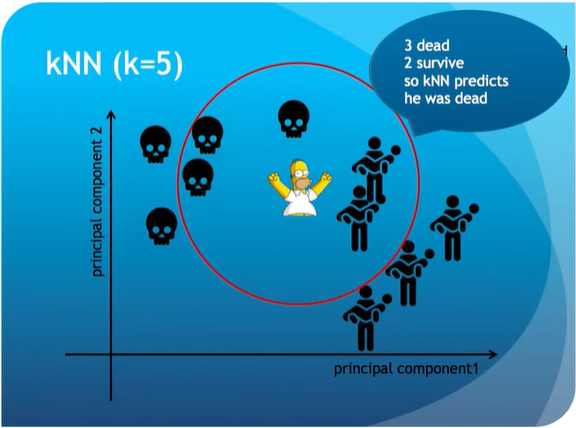

## decision tree
우리가 가지고 있는 feature들을 전부 분석해서 트리를 빌드시킨다  
각각의 데이터를 넣어서 결과 값이 나온다.  
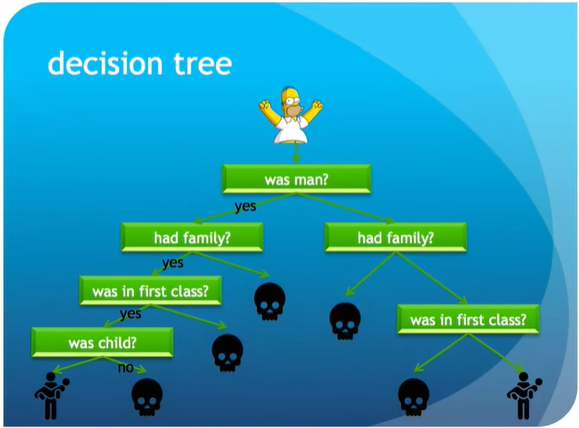

## random forest
여러개의 작은 decision tree  
각 tree의 결과 값 중 다수 값을 따라 최종 결과를 예측  
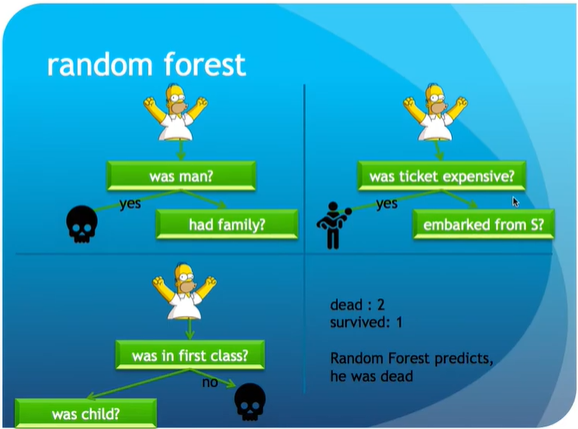

## Naive Bayes
확률을 사용한다.
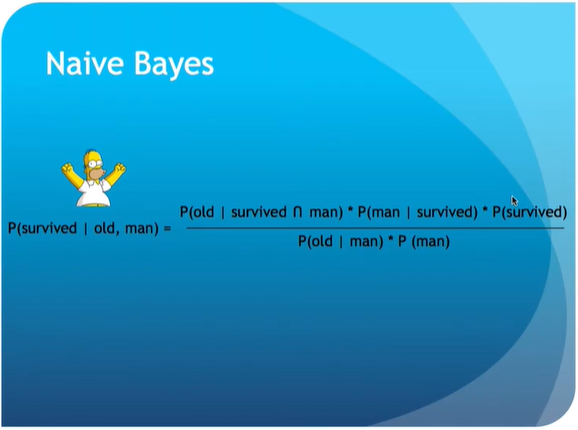

## SVM (support vector machine)
decision boundary 선을 기준으로 판단한다.
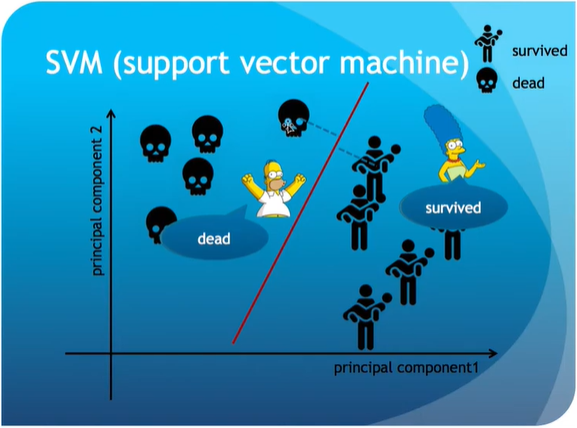

## k-fold cross validation
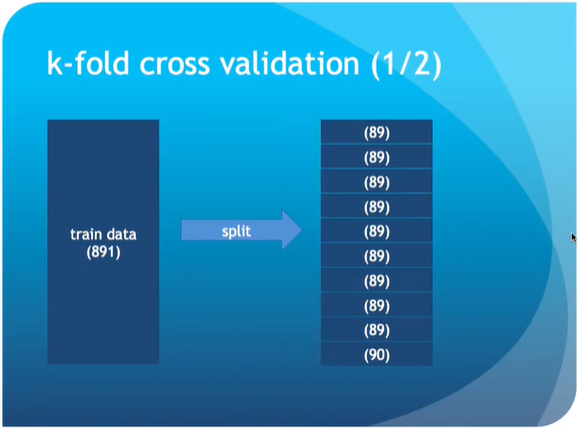
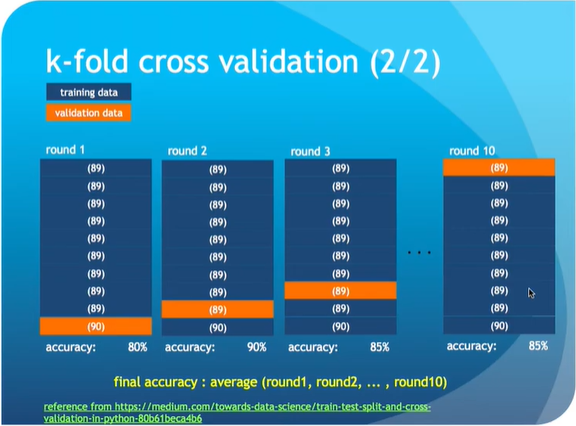

# Modelling

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
import pandas as pd

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


## Cross Validation (K-fold)

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
# 전체를 10개로 나누어 

## kNN

In [75]:
clf = KNeighborsClassifier(n_neighbors =13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.78651685 0.82022472 0.83146067 0.85393258 0.83146067
 0.84269663 0.80898876 0.83146067 0.83146067]


In [76]:
# kNN Score
round(np.mean(score)*100, 2)

82.6

## Decision Tree

In [77]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.7752809  0.88764045 0.76404494
 0.82022472 0.82022472 0.74157303 0.78651685]


In [78]:
# decision tree Score
round(np.mean(score)*100, 2)

79.58

## Random Forest

In [79]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.84269663 0.80898876 0.79775281 0.87640449 0.79775281
 0.84269663 0.80898876 0.76404494 0.82022472]


In [80]:
# Random Foreset Score
round(np.mean(score)*100, 2)

81.48

## Naive Bayes

In [81]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [82]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

## SVM

In [83]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [84]:
round(np.mean(score)*100, 2)

83.5

## Testing

In [85]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

submission.to_csv('submission.csv', index=False)

In [86]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


PassengerId : 각 승객의 고유 번호

Survived : 생존 여부(종속 변수)

0 = 사망
1 = 생존
Pclass : 객실 등급 - 승객의 사회적, 경제적 지위

1st = Upper
2nd = Middle
3rd = Lower
Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

Parch : 동반한 Parent(부모) Child(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항

C = Cherbourg
Q = Queenstown
S = Southampton